In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [170]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real America House Price')
    plt.plot(predicted, color='blue',label='Predicted America House Price')
    plt.title('House Price Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('House Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [171]:
data = pd.read_csv('American_Housing_Data_20231209.csv')
print(data.shape)
data.head()


(39981, 14)


,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [172]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  int64  
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  int64  
 3   Baths                    39979 non-null  int64  
 4   Living Space             39979 non-null  int64  
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  int64  
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(5), int64(5), ob

In [173]:
data = data.drop_duplicates()
data.shape

(39017, 14)

In [174]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

In [175]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Price'], axis=1)

scaler = MinMaxScaler()
model=scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

<AxesSubplot: >

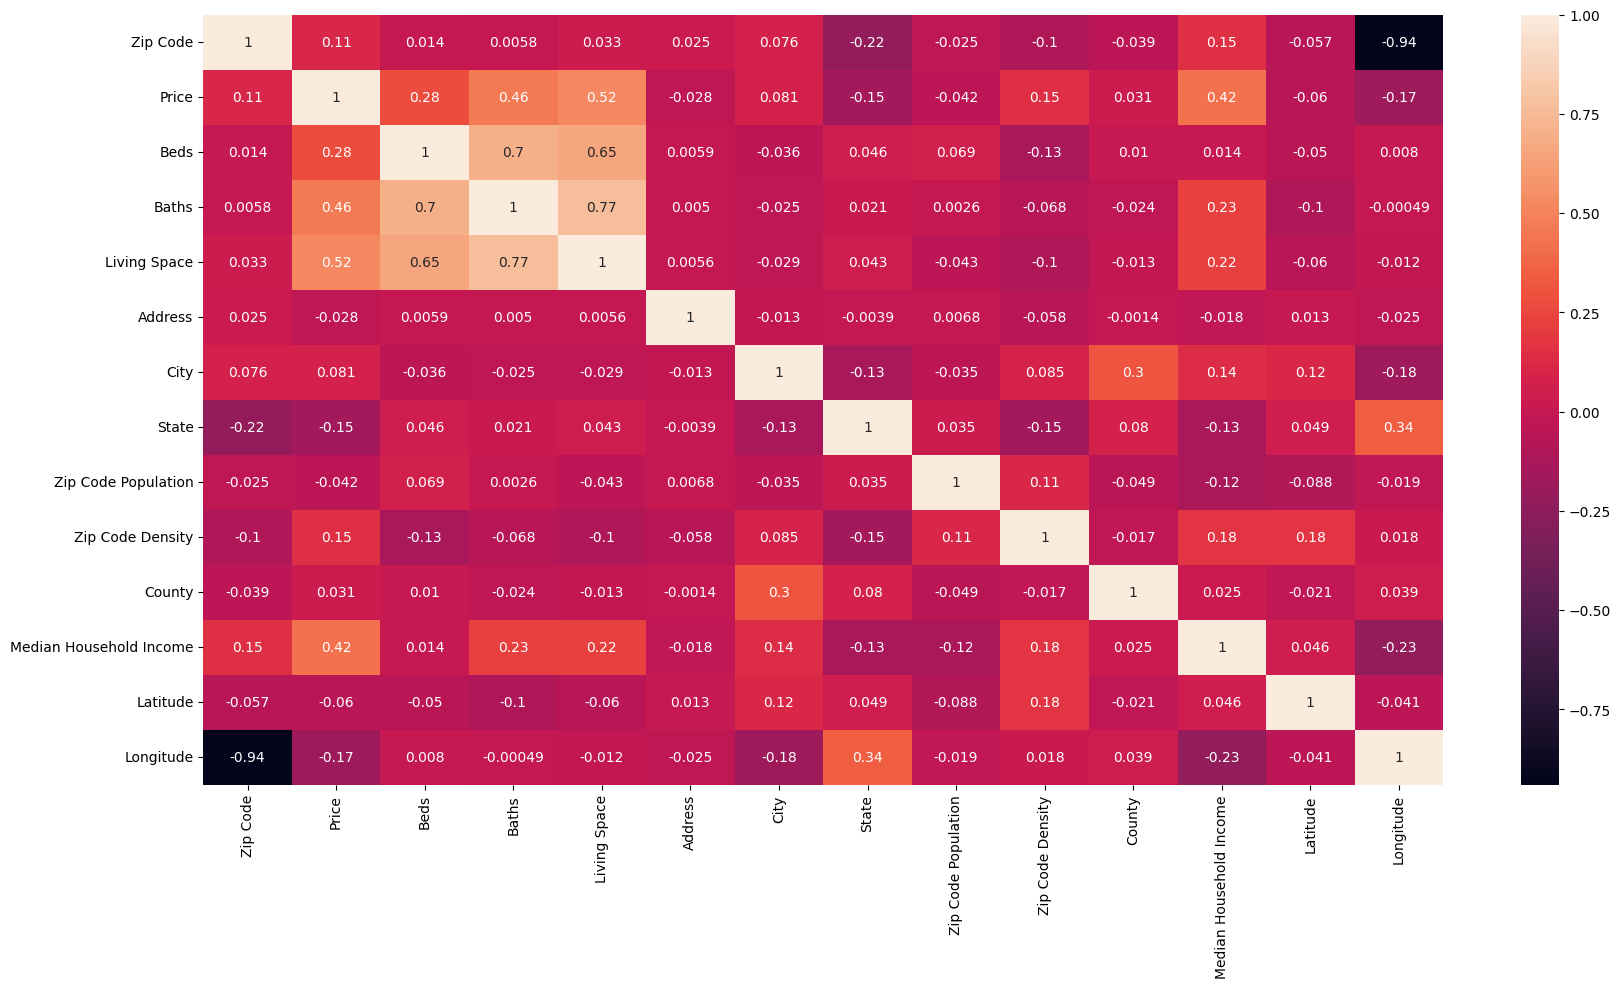

In [176]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [177]:
dataset = data.drop(['Latitude', 'Longitude', 'Zip Code Population', 'Address', 'Zip Code Density', 'Zip Code'], axis=1)

In [178]:
X = scaled_data
y = data['Price']

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

# regressor = Sequential()
# regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units=1))


# regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# regressor.fit(X_train,Y_train,epochs=50,batch_size=32)

In [185]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
976/976 [==============================] - 13s 9ms/step - loss: 1274712948736.0000 - val_loss: 1367817977856.0000
Epoch 2/50
976/976 [==============================] - 8s 8ms/step - loss: 1267993935872.0000 - val_loss: 1358427062272.0000
Epoch 3/50
976/976 [==============================] - 9s 10ms/step - loss: 1256395243520.0000 - val_loss: 1344920485888.0000
Epoch 4/50
976/976 [==============================] - 8s 8ms/step - loss: 1241131253760.0000 - val_loss: 1328169484288.0000
Epoch 5/50
976/976 [==============================] - 9s 9ms/step - loss: 1223091814400.0000 - val_loss: 1309068886016.0000
Epoch 6/50
976/976 [==============================] - 9s 9ms/step - loss: 1202709463040.0000 - val_loss: 1287743864832.0000
Epoch 7/50
976/976 [==============================] - 9s 9ms/step - loss: 1180442427392.0000 - val_loss: 1264858693632.0000
Epoch 8/50
118/976 [==>...........................] - ETA: 9s - loss: 933605277696.0000

KeyboardInterrupt: 

In [ ]:
Y_predict = model.predict(X_test)

244/244 [==============================] - 3s 6ms/step


In [ ]:
print('RMSE of test data:',np.sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE of test data: 1169853.7618824432
